# Data

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install tensorflow_datasets

In [1]:
import tensorflow as tf
import keras
import tensorflow_datasets as tfds

dataset, info = tfds.load("cats_vs_dogs", with_info = True, split=tfds.Split.TRAIN, as_supervised=True)
# (training_set, validation_set), info = tfds.load(
#     "cats_vs_dogs",
#     split=['train[:70%]', 'train[70%:]'],
#     with_info=True,
#     as_supervised=True,
# )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteRGG4NZ/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [2]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path=PosixGPath('/tmp/tmp87m2tavmtfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
  

In [3]:
class_names = info.features['label'].names
class_names

['cat', 'dog']

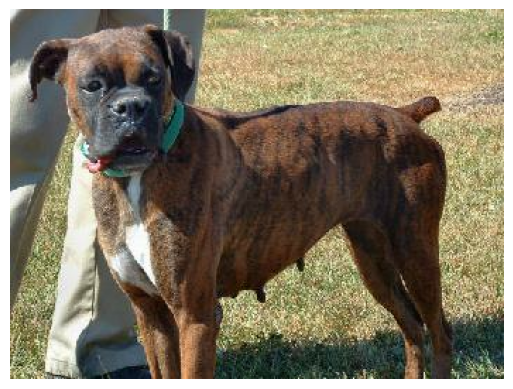

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# show image from train
for i, img in enumerate(dataset):
  # print(i)
  # print(img)
  arr_ = np.squeeze(img[0])
  plt.imshow(arr_)
  plt.axis('Off')
  plt.show()
  break


In [17]:
import os
for i, img in enumerate(dataset):
  # img = (image, label)
  image, label = img
  save_dir = '/content/drive/MyDrive/Colab Notebooks/CatDog/train/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok = True)

  filename = save_dir + "/" + '{}{}.jpg'.format(class_names[label],i)
  print(filename)
  tf.keras.utils.save_img(filename, image.numpy())

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Colab Notebooks/CatDog/train/dog/dog18262.jpg
/content/drive/MyDrive/Colab Notebooks/CatDog/train/dog/dog18263.jpg
/content/drive/MyDrive/Colab Notebooks/CatDog/train/dog/dog18264.jpg
/content/drive/MyDrive/Colab Notebooks/CatDog/train/cat/cat18265.jpg
/content/drive/MyDrive/Colab Notebooks/CatDog/train/dog/dog18266.jpg
/content/drive/MyDrive/Colab Notebooks/CatDog/train/dog/dog18267.jpg
/content/drive/MyDrive/Colab Notebooks/CatDog/train/dog/dog18268.jpg
/content/drive/MyDrive/Colab Notebooks/CatDog/train/cat/cat18269.jpg
/content/drive/MyDrive/Colab Notebooks/CatDog/train/dog/dog18270.jpg
/content/drive/MyDrive/Colab Notebooks/CatDog/train/cat/cat18271.jpg
/content/drive/MyDrive/Colab Notebooks/CatDog/train/cat/cat18272.jpg
/content/drive/MyDrive/Colab Notebooks/CatDog/train/dog/dog18273.jpg
/content/drive/MyDrive/Colab Notebooks/CatDog/train/cat/cat18274.jpg
/content/drive/MyDrive/Colab Notebooks/CatDog/train/

# Model 1

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen =   ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
	'/content/cats_vs_dogs/train',
	target_size=(150,150),
  batch_size = 256,
	class_mode='binary',
  subset = 'training'
)

validation_generator = datagen.flow_from_directory(
	'/content/cats_vs_dogs/train',
	target_size=(150,150),
  batch_size = 256,
	class_mode='binary',
  subset = 'validation'
)

Found 9312 images belonging to 2 classes.
Found 2327 images belonging to 2 classes.


In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

callback = tf.keras.callbacks.EarlyStopping(min_delta = 0.005, monitor='loss', patience=3)

model = Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # The first convolution
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    # Dropout(0.2),

    # The second convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),
    # Dropout(0.2),

    # The third convolution
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),
    # Dropout(0.2),

    # The fourth convolution
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),
    # Dropout(0.2),

    # Flatten the results to feed into a DNN
    Flatten(),
    Dropout(0.5),

    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
    # Dense(2, activation='softmax')
])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 74, 74, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                        

In [20]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=20, validation_data = validation_generator)



Epoch 1/20
37/37 [==============================] - 100s 2s/step - loss: 1.2884 - accuracy: 0.6158 - val_loss: 0.7205 - val_accuracy: 0.5221
Epoch 2/20
37/37 [==============================] - 97s 3s/step - loss: 0.9311 - accuracy: 0.6707 - val_loss: 1.2228 - val_accuracy: 0.4972
Epoch 3/20
37/37 [==============================] - 84s 2s/step - loss: 0.6772 - accuracy: 0.7087 - val_loss: 0.7229 - val_accuracy: 0.5161
Epoch 4/20
37/37 [==============================] - 83s 2s/step - loss: 0.5589 - accuracy: 0.7479 - val_loss: 1.0972 - val_accuracy: 0.4972
Epoch 5/20
37/37 [==============================] - 80s 2s/step - loss: 0.5011 - accuracy: 0.7702 - val_loss: 1.0087 - val_accuracy: 0.4972
Epoch 6/20
37/37 [==============================] - 83s 2s/step - loss: 0.4352 - accuracy: 0.8022 - val_loss: 1.4423 - val_accuracy: 0.4972
Epoch 7/20
37/37 [==============================] - 81s 2s/step - loss: 0.4171 - accuracy: 0.8133 - val_loss: 0.8544 - val_accuracy: 0.5320
Epoch 8/20
37/37 [=

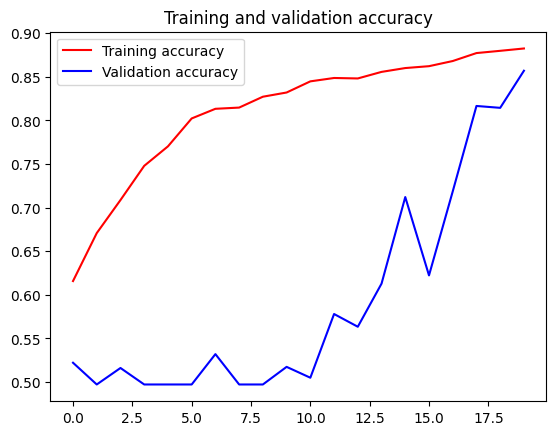

<Figure size 640x480 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [23]:
model.save("/content/drive/MyDrive/Colab Notebooks/CatDog/cats_vs_dogs.h5")

In [24]:
model_load = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/CatDog/cats_vs_dogs.h5')

In [25]:
train_generator.class_indices.items()

dict_items([('cat', 0), ('dog', 1)])

In [26]:
label = {v:k for k,v in train_generator.class_indices.items()}
label

{0: 'cat', 1: 'dog'}

Saving group-portrait-of-adorable-puppies-royalty-free-image-1687451786.jpg to group-portrait-of-adorable-puppies-royalty-free-image-1687451786 (2).jpg
{'group-portrait-of-adorable-puppies-royalty-free-image-1687451786 (2).jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x04\xac\x04\xb0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x03\x02\x04\x05\x06\x07\x08\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xfa\x10\xc6\x80\x00\x00\x00\x

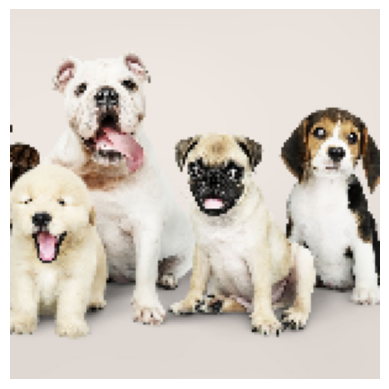

1/1 [==============================] - 0s 26ms/step
group-portrait-of-adorable-puppies-royalty-free-image-1687451786 (2).jpg
dog


In [40]:
import numpy as np
from google.colab import files
# import tf.keras.utils as image

uploaded = files.upload()
print(uploaded)
for filename in uploaded.keys():

  # predicting images
  path = filename
  img = tf.keras.utils.load_img(path, target_size=(150, 150))
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(filename)
  print(label[int(classes)])

# VGG-16 Model

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen =   ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
	'/content/cats_vs_dogs/train',
	target_size=(224,224),
  batch_size = 256,
	class_mode='binary',
  subset = 'training'
)

validation_generator = datagen.flow_from_directory(
	'/content/cats_vs_dogs/train',
	target_size=(224,224),
  batch_size = 256,
	class_mode='binary',
  subset = 'validation'
)

Found 9312 images belonging to 2 classes.
Found 2327 images belonging to 2 classes.


In [42]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [43]:
for layer in vgg.layers:
    layer.trainable = False

In [44]:


# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(vgg.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = tf.keras.layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(vgg.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])


In [ ]:
vgghist = model.fit(train_generator, validation_data = validation_generator, epochs = 10)

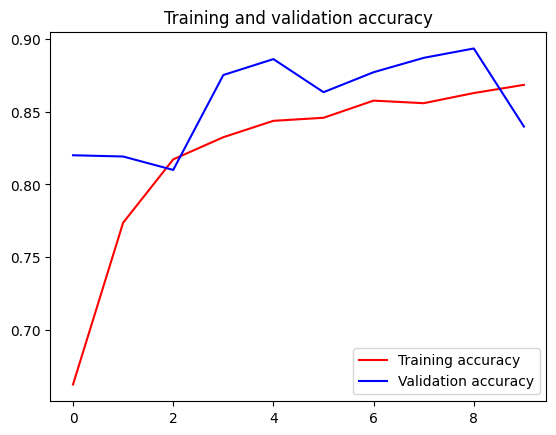

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = vgghist.history['acc']
val_acc = vgghist.history['val_acc']
loss = vgghist.history['loss']
val_loss = vgghist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50

resnet50 = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
for layer in resnet50.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

resnet50 = Sequential()
resnet50.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
resnet50.add(Dense(1, activation='sigmoid'))

In [ ]:
resnet50.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])


In [ ]:
resnet_history = base_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)


In [ ]:
import matplotlib.pyplot as plt
acc = vgghist.history['acc']
val_acc = vgghist.history['val_acc']
loss = vgghist.history['loss']
val_loss = vgghist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()